### Section 2 - Logistic Regression

The central premise of Logistic Regression is the assumption that your input space can be separated into two ‘regions’, one for each class, by a linear boundary. Basically, its a type of model that is really good at answering binary questions such as yes or no to whether something will occur. The 'magic' of logistic regressions comes from the fact that most things do not have a perfectly linear relation and therefore a special sigmoid function is more useful. The sigmoid function allows us to predict probabilites of an event occuring.(See below: Image copyright @ Kirll Eremenko )  

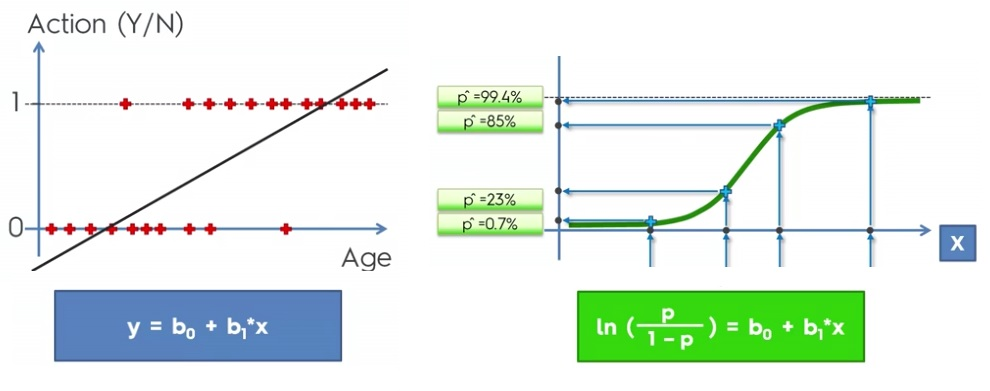

In [1]:
from IPython.display import Image
Image(filename='./images/01.jpg', width=500)

We will use the Logistic Regression as a baseline model to compare our other machine learning algorithms

In [2]:
import numpy as np   #Mathematics library
import matplotlib.pyplot as plt # for plotting
import pandas as pd  #manage datasets
import seaborn as sea
import scipy.stats as stats
import sklearn

In [3]:
df = pd.read_csv('ImputeMissing.csv')
df=df.drop('Unnamed: 0',axis=1)

#### Dummy Variables

A Dummy variable or Indicator Variable is an artificial variable created to represent an attribute with two or more distinct categories/levels. The panda "get_dummies" below creates as many dummy variables that is needed for specific feature. It also automatically drops the original feature as well as avoids the dummy variable trap by dropping the first category of that feature. 

In [4]:
###Convert 15 Categorical to Dummies
df=pd.get_dummies(df,columns=['Auction','Make','Model','Trim','Color','Transmission','WheelType','Nationality','Size','TopThreeAmericanName','PRIMEUNIT','AUCGUART','VNZIP1','VNST','IsOnlineSale'],drop_first=True)


After we converted our categorical variables into dummies, we end up with over 1500 features. 

In [5]:
# Spliting the data set in Target and Explainatory features. 
dataset = df
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values

### Train / Test Split
Andrew Ng, former head of Google's A.I, believes that size of the test set should be enough to give a high confidence. If we had 1 million instances, a 2% test split would be sufficient. We have approximately ~72,000 instances so we will stay closer to the more standard split and set aside 25% of the data to our test set. 

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


### Feature Scaling
Feature scaling helps future algoritms run faster. Some algorithms require feature scaling while the logistic regression does not. Depending on the size of the dataset, we may not need to feature scale. Feature scaling makes our model less interpretable, although we can inverse transform to return to our original scale. 

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### DIMENSIONALITY REDUCTION - FEATURE EXTRACTION

Feature Extraction techniques share the same benefit as Feature Selection techniques but without the benefits of interpretability. This loss in interpretibilty often comes with a gain in model accrucary and usability. There are some instances such as in Medicine or Finance where the model must remain interpretable. In these cases, Feature Extraction technqiues should be avoided.  

#### Principal Component Analysis (PCA)
In PCA, new independent variables are extracted from the dataset that explain the most variance. It does so without needing analyzing the dependent variable. This is an unsupervised model. A common strategy is to reduce the number of principal components to just two and visualize the data. Even though we need to reduce our number of features, we do not use PCA for this analysis. Instead we will use Linear Discriminant Analysis. Since Logistic Regressions require a linear discriminant built into their function. 

In [8]:
# Applying PCA
"""
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance
"""

'\nfrom sklearn.decomposition import PCA\npca = PCA(n_components = 10)\nX_train = pca.fit_transform(X_train)\nX_test = pca.transform(X_test)\nexplained_variance = pca.explained_variance_ratio_\nexplained_variance\n'

#### Linear Discriminant Analysis (LDA)
Unlike the PCA, which extracts features that explain the most variance, LDA extracts new independent variables that separate the most classes of dependent variable. Since the dependent variable is considered, LDA is a supervised dimensionality reduction model. 


In [9]:
# Applying LDA 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 10)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


C:\Users\volak\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


#### Kernal (PCA)
The previous two feature extraction techniques works for models that are linearly separatable. Kernal PCA can be used for non linearly separateable data. It is kernealized version of PCA where we map the data into a higher dimension using the kernal trick and from there we extract new principal components. 


In [10]:
# Applying Kernel PCA
"""
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 10, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)
"""

"\nfrom sklearn.decomposition import KernelPCA\nkpca = KernelPCA(n_components = 10, kernel = 'rbf')\nX_train = kpca.fit_transform(X_train)\nX_test = kpca.transform(X_test)\n"

### Training the Logistic Regression

In [11]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

### Testing Model Accuracy, Precision and Recall

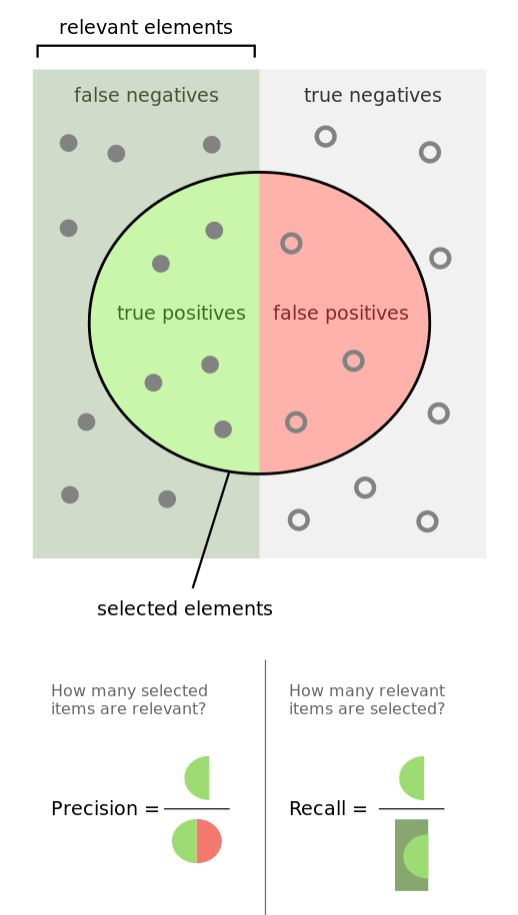

In [13]:
Image(filename='./images/02.jpg', width=300)
# Image source https://en.wikipedia.org/wiki/File:Precisionrecall.svg

Recall in this context is also referred to as the true positive rate or sensitivity, and precision is also referred to as positive predictive value (PPV). Accuracy is total corerct predictions; true negative rate(specificity) plus true positive rate. The F1 score ist he harmonic mean of precision and recall. 

In [14]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[15739,   271],
       [ 1632,   604]])

In [15]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.89570316781760384

In [16]:
# Precision 
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)


0.69028571428571428

In [17]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)


0.2701252236135957

In [18]:
# F1 score
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)


0.38829958212793309

In [19]:
# Cohen's kappa
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)


0.34300970745561998

### k-Fold Cross Validation
Sometimes we run into the variance problem. The variance problem occurs when we rerun our models again but recieve a different accrucay than our previous model. The k -fold solves this problem by splitting our training and test set into many folds; ten being the most common split. 

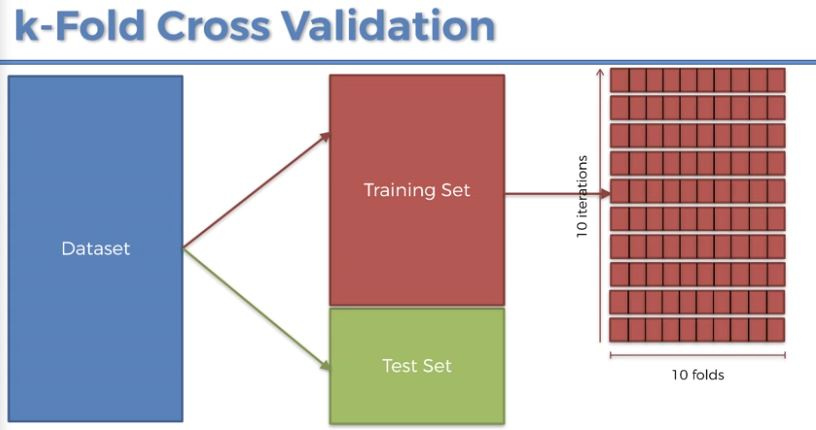

In [20]:
Image(filename='./images/03.jpg', width=500)
# Image source @superdatascience.com

In [21]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()


0.89687049741845593

In [22]:
accuracies.std()

0.0020877547330240272

### Bias Variance Tradeoff
There are four scenarios that usually occur; high bias / low variance, high bias / high variance, low bias / low variance, low bias / high variance. 
Our results had a low variance and low bias

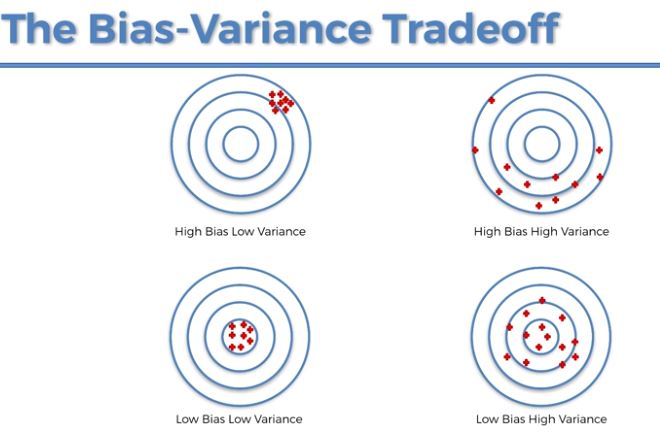

In [23]:
Image(filename='./images/04.jpg', width=500)
# Image source @superdatascience.com